# **Grouping wines based on their characteristics**

If plotly isn't installed, write *pip install plotly* in your terminal and hit Enter

In [267]:
# Importing the necessary libraries
import plotly.graph_objects as go
import pandas as pd
import numpy as np

In [268]:
df = pd.read_csv('data/wine.csv')

print("This dataframe has {} elements, with {} attributes each".format(df.shape[0], df.shape[1]))
df.head()

This dataframe has 178 elements, with 14 attributes each


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


Let's now remove the *Customer_Segment* attribute from the dataset

In [269]:
df = df.drop(columns = 'Customer_Segment')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Analysing our data

### The *describe()* method shows some basic, but relevant statistics about our dataframe:

In [270]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Let's see the correlation between the variables. If we find variables that are too correlated, we can eliminate one (or more) of them 

In [271]:
corr_matrix = df.corr() # DataFrame.corr() returns a dataframe
corr_matrix

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


Let's visualize it better using *biokit*. If biokit isn't installed, write *pip install biokit* in your terminal and hit Enter

In [272]:
from biokit.viz import corrplot
import matplotlib.pyplot as plt

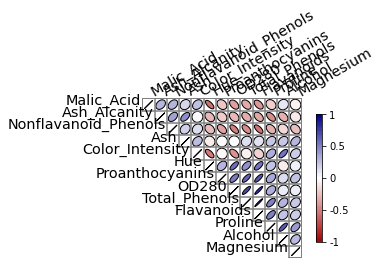

In [273]:
corr_graph = corrplot.Corrplot(corr_matrix)
corr_graph.plot(upper='ellipse', fontsize='x-large')

Looks weird. Let's adjust our figure

C:\Users\PEDRO~1.HEC\AppData\Local\Temp/ipykernel_6372/1977575684.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



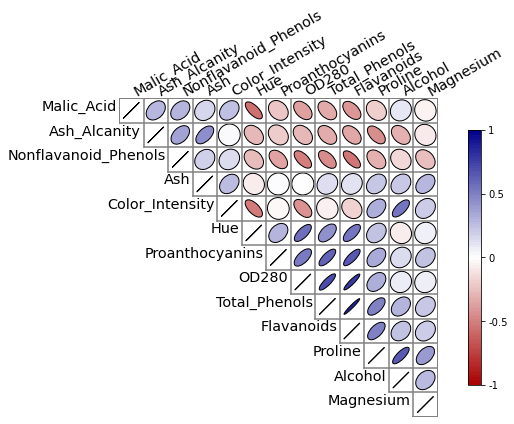

In [274]:
corr_graph = corrplot.Corrplot(corr_matrix)
corr_graph.plot(upper='ellipse', fontsize='x-large')

# Setting figure size
fig = plt.gcf()
fig.set_size_inches(13,8)
fig.show()

It becomes clear that the variables *Total_Phenols* and *Flavanoids* are strongly correlated; there are others that are correlated too. Let's keep that in mind.

## Normalizing the dataframe

### Most machine learning models and algorithms don't deal well with variables that have very different ranges. For example, in our dataset, the *Ash* variable's max value is 3.23, while *Proline* has a max value of 1680. These are very different and may lead to the algorithm weighting one variable as more important than another one. To deal with that, we're going to **normalize our dataframe**.

### Manual normalization

In [275]:
attributes = df.columns

for att in attributes:
    df[att] = (df[att] - min(df[att])) / (max(df[att]) - min(df[att])) # We're using the min-max-scaler formula for our normalization


In [276]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


You can see how the min and max values have all changed to 0 and 1. That's what this normalization technique does!

### Automatic normalizing (with Sklearn)

In [277]:
from sklearn import preprocessing

df = pd.read_csv('data/wine.csv') # Importing our unormalized data again 

df = df.drop(columns = 'Customer_Segment')

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df) # fit_transform transforms our dataframe and returns returns a numpy array

df = pd.DataFrame(np_df, columns=attributes)
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


What's cool about this is that we can reverse the dataframe to the values it had before!

In [278]:
np_df = min_max_scaler.inverse_transform(df)
original_df = pd.DataFrame(np_df, columns=attributes)
original_df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## Now starting with clustering

# Clustering Method 1 - KMeans

In [279]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=4) # Here we can set the amount of groups we want to divide our dataset in
cluster.fit(df)

KMeans(n_clusters=4)

In [280]:
labels = cluster.labels_
print(labels)

[0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 3 1 1 3 1 1 1 1 3 1 3
 3 1 1 1 1 3 1 3 1 2 3 1 1 1 1 1 1 1 1 3 3 0 1 1 3 3 1 1 3 1 1 1 1 1 1 3 3
 3 1 1 1 1 1 1 2 1 3 3 3 3 3 3 3 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


### Visualizing the clusters in a 2D graph

Since we can't visualize a multidimensional (n>3) graph, we must choose arbitrarily 2 (for 2D graphs) or 3 (for 3D graphs) features of our dataset to be represented in our graph. 

Since we're going to make a 2D graph, we can choose 2 features of our liking

In [281]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df['Alcohol'],
    y = df['Color_Intensity'],
    mode = 'markers',
    marker = dict(color = labels.astype(np.float)),
    text = labels
))

fig.show()

C:\Users\PEDRO~1.HEC\AppData\Local\Temp/ipykernel_6372/2442640266.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Let's see another one, now using other features

In [282]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df['Malic_Acid'],
    y = df['Hue'],
    mode = 'markers',
    marker = dict(color = labels.astype(np.float)),
    text = labels
))

fig.show()

C:\Users\PEDRO~1.HEC\AppData\Local\Temp/ipykernel_6372/3972392358.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



The clusters seem to overlap because we're only seeing two dimensions. If we could see all the dimensions at once, we would see clearer borders between each cluster!

### Changing the value of K to better visualize the clusters

In [283]:
cluster = KMeans(n_clusters=3)
cluster.fit(df)
labels = cluster.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [284]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x = df['Alcohol'],
    y = df['Color_Intensity'],
    mode = 'markers',
    marker = dict(color = labels.astype(np.float)),
    text = labels
))

fig.show()

C:\Users\PEDRO~1.HEC\AppData\Local\Temp/ipykernel_6372/2442640266.py:6: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### Now visualizing in 3D

In [285]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = df['Alcohol'],
    y = df['Color_Intensity'],
    z = df['Malic_Acid'],
    mode = 'markers',
    marker = dict(color = labels.astype(np.float)),
    text = labels    
))

# Labeling the axes
fig.update_layout(
    scene = dict(
        xaxis_title = 'Alcohol', 
        yaxis_title = 'Color Intensity', 
        zaxis_title = 'Malic Acid'
    )
)

fig.show()

C:\Users\PEDRO~1.HEC\AppData\Local\Temp/ipykernel_6372/619108600.py:7: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Let's add the center of the clusters now

In [286]:
centers = pd.DataFrame(cluster.cluster_centers_)
centers.columns = attributes
centers.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
1,0.313367,0.235617,0.473050,0.500245,0.245514,0.448057,0.380082,0.418688,0.397176,0.147787,0.472190,0.584220,0.156375
2,0.546686,0.484409,0.561596,0.538660,0.315217,0.246743,0.104743,0.614256,0.225435,0.488781,0.188889,0.158527,0.249115


In [287]:
fig.add_trace(go.Scatter3d(
    x = centers['Alcohol'],
    y = centers['Color_Intensity'],
    z = centers['Malic_Acid'],
    mode = 'markers',
    marker = dict(color = 'red'),
    text = [0, 1, 2]
))

fig.show()

# Clustering Method 2 - DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [288]:
from sklearn.cluster import DBSCAN

cluster = DBSCAN(
    eps = 1.31, # The maximum distance between two points for them to be considered neighbours
    min_samples = 15, # The minimum number of points to form a cluster. It's useful to deal with outliers
    metric = 'manhattan' # The method used to calculate distances between the points. The default is euclidean.
)

cluster.fit(df)

# Note: The Manhattan Distance is preferred over the Euclidean distance metric as the dimension of the data increases

# Note 2: Notice that we haven't told the DBSCAN algorithm the number of groups we'd like. It clusters in how many groups it sees fit,
# depending on what values we put in the 'eps', 'min_samples', and other parameters.

DBSCAN(eps=1.31, metric='manhattan', min_samples=15)

Let's see the labels

In [289]:
cluster.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1,  1,  1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  2, -1,  2, -1,  2,
       -1, -1,  2, -1, -1,  2, -1, -1,  2,  2, -1,  2,  2,  2, -1, -1, -1,
        2, -1,  2,  2, -1, -1, -1,  2,  2,  2,  2,  2, -1,  2,  2,  2, -1,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

What are these '-1' all over the place? That's what the DBSCAN considered as noise in our dataset. Every point that does not satisfy our eps parameter falls into the noise category

To see how many clusters the DBSCAN algorithm has divided our dataset into, we can simply do

In [290]:
np.unique(cluster.labels_)

array([-1,  0,  1,  2], dtype=int64)

Let's see how the parameters affect the clustering

In [291]:
cluster = DBSCAN(
    eps = 0.01, # We're changing this parameter so only very close points can be considered neighbours. Let's see how this changes the results
    min_samples = 15,
    metric = 'manhattan'
)
cluster.fit(df)
cluster.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

As you can see, the algorithm has considered all the points to be noise! That's because we only allowed a cluster to have at least 15 points, but since the neighbourhood limit was set so low (eps = 0.01), there were not enough points this close to each other to form any cluster. Therefore, they've been all labeled as noise 

What about a big eps value?

In [292]:
cluster = DBSCAN(
    eps = 10, # We're changing this parameter so even distant points are considered neighbours. Let's see how this changes the results
    min_samples = 15,
    metric = 'manhattan'
)
cluster.fit(df)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

They've all formed one giant cluster!

# Clustering Method 3 - Mean-Shift

This is a method that doesn't require any parameters

In [293]:
from sklearn.cluster import MeanShift

cluster = MeanShift()
cluster.fit(df)

cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

Let's adjust this a little better. For that, we're going to import a new module, called *estimate_bandwidth*. 

As to the parameters, *quantile* can be a value between 0 and 1. The *estimate_bandwidth()* function calculates the distance between every point and lines them up in ascending order. The *quantile* value tells the distance that's in this position in the ascending series (for example, a *quantile* of 0.5 results in the bandwidth being equal to the median distance, while for a *quantile* of 0.1 the bandwidth will be equal to the distance positioned at the 10% spot).

In [294]:
from sklearn.cluster import estimate_bandwidth

bw = estimate_bandwidth(df, quantile = 0.2)
cluster = MeanShift(bw)
cluster.fit(df)
cluster.labels_ 


C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.7043768552127612 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 2, 1, 0, 0, 3, 0, 1, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [295]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


Let's see it graphically

In [296]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x = df['Alcohol'],
    y = df['Color_Intensity'],
    z = df['Malic_Acid'],
    mode = 'markers',
    marker = dict(color = cluster.labels_.astype(float)),
    text = [0, 1, 2]
))

fig.update_layout(scene = dict(
    xaxis_title = 'Alcohol',
    yaxis_title = 'Color Intensity',
    zaxis_title = 'Malic Acid'
))

centers = pd.DataFrame(cluster.cluster_centers_)
centers.columns = attributes

# Adding the centers
fig.add_trace(go.Scatter3d(
    x = centers['Alcohol'],
    y = centers['Color_Intensity'], 
    z = centers['Malic_Acid'],
    mode = 'markers',                  
    marker = dict(color = 'red'),
    text = [0, 1, 2]
))

fig.show()

Is there, however, a way to measure how good our clustering is? What can we do to determine it?

## Silhouette Coefficient

### Silhouette Coefficient - KMeans

In [297]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters = [i for i in range(2, 10)] # We're creating a list of numbers to test how many clusters (n) is best for our K-Means clustering

silhouette_values = []
for k in n_clusters:
    cluster = KMeans(n_clusters = k)
    labels = cluster.fit_predict(df) # fit_predict() does the same as fit() but already returns the labels it predicted
    silhouette_mean = silhouette_score(df, labels)
    silhouette_values.append(silhouette_mean)

silhouette_values

[0.2987221815974774,
 0.3008938518500134,
 0.25993667561623146,
 0.21180328335779602,
 0.20536919756847663,
 0.21022807561905904,
 0.13737730657955563,
 0.1397572454213094]

In [298]:
fig = go.Figure()
fig.add_trace(go.Scatter( x = n_clusters, y = silhouette_values))
fig.update_layout(
    title = "Mean Silhouette Per Number of Clusters",
    xaxis_title = "Number of Clusters",
    yaxis_title = "Mean Silhouette Value"
)

Since higher silhouette scores means better clusters, we can see clearly that, **for this dataset**, too many clusters is not a good thing. In fact, the optimal number of clusters seems to be 3.

### Silhouette Coefficient - Mean-Shift

In [299]:
quantile_values = np.linspace(0.02, 0.5, 50) # Creating a list of 50 values that go from 0.02 to 0.5

silhouette_values = []
quantile_plot = [] # To store only the quantile values that allow for a silhouette score to be calculated

for q in quantile_values:
    bw = estimate_bandwidth(df, quantile = q)
    cluster = MeanShift(bw)
    labels = cluster.fit_predict(df)

    if(len(np.unique(labels)) < len(df) and len(np.unique(labels)) > 1): # The silhouette score only works for 1 < number of labels < number of points 
        silhouette_mean = silhouette_score(df, labels)
        silhouette_values.append(silhouette_mean)
        quantile_plot.append(q)

C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.4116916959606235 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.46549579421430276 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.4988314323670696 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.5100454568437629 as keyword args

In [300]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = quantile_plot, y = silhouette_values))
fig.update_layout(
    title = "Mean Silhouette Per Quantile Value",
    xaxis_title = "Quantile Values",
    yaxis_title = "Mean Silhouette Value"
)

We can see how, **for this dataset**, bigger quantile values gives us a higher silhouette score. However, the highest silhouette score here is about 0.26, which is still quite far from 1. Maybe this tells us that the Mean-Shift may not be the best clustering model for this data. 

## Now comparing KMeans, DBSCAN and MeanShift

In [302]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score

# Creating the clusterers
kmeans_cluster = KMeans(n_clusters = 3)
dbscan_cluster = DBSCAN(eps = 2.1, min_samples = 56, metric = 'manhattan')
bw = estimate_bandwidth(df, quantile = 0.28)
meanshift_cluster = MeanShift(bw)

# Fitting our dataframe to the clusterers
kmeans_labels = kmeans_cluster.fit_predict(df)
dbscan_labels = dbscan_cluster.fit_predict(df)
meanshift_labels = meanshift_cluster.fit_predict(df)

print('Labels KMeans:\n{}\n\nLabels DBSCAN:\n{}\n\nLabels MeanShift:\n{}'.format(kmeans_labels, dbscan_labels, meanshift_labels))

C:\Users\PEDRO.HECK\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning:

Pass bandwidth=0.7896698879803351 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



Labels KMeans:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 1 1 1 1 1 1 2 1 2 1 1 0
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]

Labels DBSCAN:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0 -1  0
  0 -1  0  0 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]

Labels MeanShift:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [304]:
print('KMeans Silhouette Score: {}\nDBSCAN Silhouette Score: {}\nMeanShift Silhouette Score: {}'.format(silhouette_score(df, kmeans_labels), silhouette_score(df, dbscan_labels), silhouette_score(df, meanshift_labels)))

KMeans Silhouette Score: 0.3013463273503232
DBSCAN Silhouette Score: 0.2770638783298969
MeanShift Silhouette Score: 0.26375348680377736


We can conclude from the silhouette score that the K-Means technique is the best clustering method for our dataset, and that, using this method, the best number of clusters we should divide our data in is 3.  